In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from dosipy.utils.viz import (set_colorblind, fig_config, set_axes_equal,
                              save_fig)

In [2]:
%config InlineBackend.figure_format = 'retina'

In [105]:
def generate_random_pc(n_points=31, slope=(0.5, 0.), extent=2, noise=2):
    np.random.seed(123)
    slope_x, slope_y = slope
    x_target = 0
    y_target = 0
    z_target = slope_x * x_target + slope_y * y_target
    target = (0, 0, z_target)
    x = np.random.normal(loc=x_target, scale=extent, size=n_points)
    y = np.random.normal(loc=y_target, scale=extent, size=n_points)
    z = slope_x * x + slope_y * y + np.random.normal(scale=noise, size=x.size)
    pc = np.c_[x, y, z]
    return pc, target


def PCA(pc):
    mean_pc = np.mean(pc, axis=0)
    normalized_pc = pc - mean_pc
    H = np.dot(normalized_pc.T, normalized_pc)
    eigenvector, eigenvalue, _ = np.linalg.svd(H)
    return eigenvalue, eigenvector

In [106]:
slope = (0.5, 0.)
pc, target = generate_random_pc(slope=slope)
xs = np.linspace(pc[:, 0].min(), pc[:, 0].max(), 33)
ys = np.linspace(pc[:, 1].min(), pc[:, 1].max(), 33)
X, Y = np.meshgrid(xs, ys)
Z = slope[0] * X + slope[1] * Y

eigenvalue, eigenvector = PCA(np.c_[X.ravel(), Y.ravel(), Z.ravel()])
n = eigenvector[:, np.where(eigenvalue == eigenvalue.min())[0]]

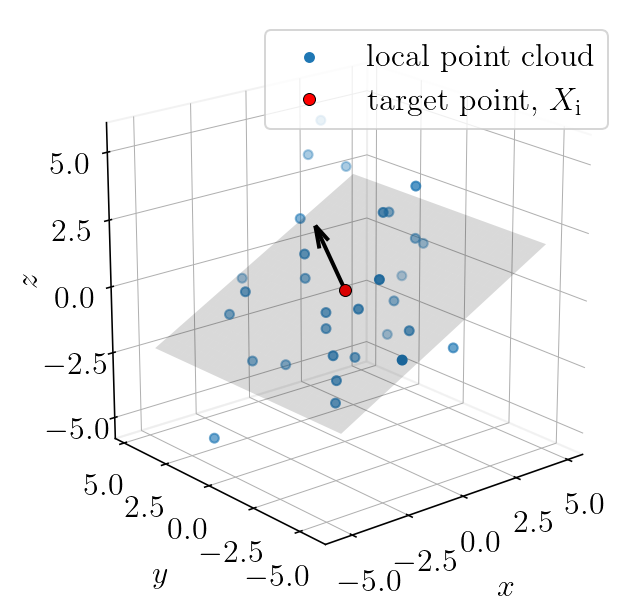

In [116]:
fig_config(latex=True, text_size=16, scaler=1.5, line_width=2)
fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.scatter(*pc.T, label='local point cloud', zorder=0)
ax.plot(*target, 'ro', ms=6, label='target point, $X_\\text{i}$', zorder=4)
ax.plot_surface(X, Y, Z, color='k', ec='none', alpha=0.15)
ax.quiver(*target, *n, normalize=True, color='k', length=3, zorder=1)
#ax.quiver(*target, *eigenvector[:, 0], normalize=True, color='k', length=3, zorder=1)
#ax.quiver(*target, *eigenvector[:, 1], normalize=True, color='k', length=3, zorder=1)
           
ax.set(xlabel='$x$', ylabel='$y$')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('$z$', rotation=90)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 5
ax.view_init(20, -130)
ax.set_box_aspect([1, 1, 1])
ax = set_axes_equal(ax)
ax.legend(loc='upper right')
fig.tight_layout()

# save figure
#fname = os.path.join('figures', 'normals')
#save_fig(fig, fname=fname, formats=['png'])